In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_pca = pd.read_pickle("clean-data/train-pca.pkl")
train_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,pickup_to_arrival_time
0,0.471082,0.270344,-0.486887,0.600463,-0.540924,-1.615606,745
1,0.624127,1.498240,-0.350465,-0.674034,0.329674,0.866783,2886
2,0.528462,-0.477729,0.776858,0.343377,0.045975,-0.084287,2615
3,0.635800,0.729681,-2.567904,0.609702,-0.724023,0.841407,2986
4,0.562681,-0.769030,-1.075503,0.506759,-0.834757,-0.026859,1602


In [3]:
from sklearn.linear_model import LinearRegression
linear_pca = LinearRegression()
X = train_pca.iloc[:, :-1]
y = train_pca["pickup_to_arrival_time"]
linear_pca.fit(X=X, y=train_pca["pickup_to_arrival_time"])

LinearRegression()

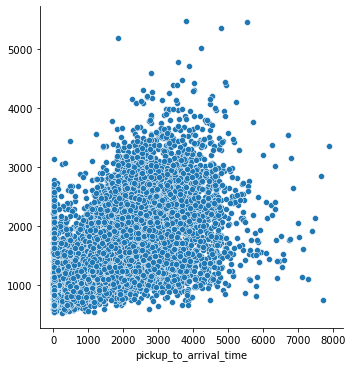

In [5]:
y_pred = linear_pca.predict(X)
sns.relplot(x=y, y=y_pred, kind="scatter")

In [6]:
# Running cross-validation
from sklearn.model_selection import cross_val_score

cross_val_score(linear_pca, X=X, y=y, cv=10).mean()

0.3354759483754492